In [1]:
!git clone https://github.com/niazwazir/IMAGESDISPLYFROMDIRECTORY.git

Cloning into 'IMAGESDISPLYFROMDIRECTORY'...
remote: Enumerating objects: 48, done.
remote: Total 48 (delta 0), reused 0 (delta 0), pack-reused 48
Unpacking objects: 100% (48/48), done.


In [2]:
!ls

IMAGESDISPLYFROMDIRECTORY  sample_data


In [3]:
cd IMAGESDISPLYFROMDIRECTORY

/content/IMAGESDISPLYFROMDIRECTORY


In [4]:
!ls

GTIMAGES  HRIMAGES  LRIMAGES


In [0]:
!rm -R GTIMAGES

In [6]:
!ls

HRIMAGES  LRIMAGES


In [0]:
!mkdir HRIMAGES_RESIZE LRIMAGES_RESIZE

In [8]:
!ls

HRIMAGES  HRIMAGES_RESIZE  LRIMAGES  LRIMAGES_RESIZE


In [0]:
from PIL import Image
import os, sys

In [0]:
path = "HRIMAGES/"
path1="HRIMAGES_RESIZE/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path1+item)
            imResize = im.resize((64,64), Image.ANTIALIAS)
            imResize.save(f + 'resized.bmp', 'bmp', quality=90)

resize()


In [0]:
path = "LRIMAGES/"
path2="LRIMAGES_RESIZE/"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path2+item)
            imResize = im.resize((64,64), Image.ANTIALIAS)
            imResize.save(f + 'resized.bmp', 'bmp', quality=90)

resize()


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from skimage.io import imread
from glob import glob

In [0]:
clean_images_path = glob('./HRIMAGES_RESIZE/*.*')
blurry_images_path = glob('./LRIMAGES_RESIZE/*.*')
Images = []; Blurry = []
for image, blurry in zip(clean_images_path, blurry_images_path):
    Images.append(imread(image))
    Blurry.append(imread(blurry))
Images = np.array(Images).astype('float32')
Blurry = np.array(Blurry).astype('float32')

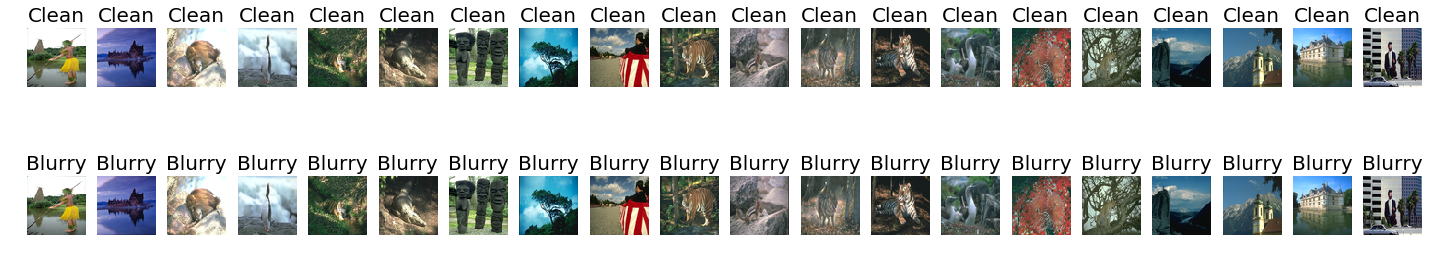

In [14]:
f, ax = plt.subplots(2,20,figsize=(25,5))
for i in range(20):
    ax[0,i].imshow(Images[i].astype('uint8'));  ax[0,i].axis('Off'); ax[0,i].set_title('Clean', size=20)
    ax[1,i].imshow(Blurry[i].astype('uint8'));  ax[1,i].axis('Off'); ax[1,i].set_title('Blurry', size=20)
plt.show()